# kmeans

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('car-mpg.csv')

In [3]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
df.drop(labels='car_name',axis=1,inplace=True)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [6]:
import numpy as np
df.hp[df.hp.str.isdigit()==False].unique()

array(['?'], dtype=object)

In [7]:
df[df.hp!='?'].hp.median()

93.5

In [8]:
df.hp.replace({'?': df[df.hp!='?'].hp.median()},inplace=True)
df.hp[df.hp.str.isdigit()==False].unique()

array([], dtype=object)

In [9]:
df['hp']=df.hp.astype('float')
df.hp.dtype

dtype('float64')

# scaling


In [10]:
from sklearn import preprocessing
col=list(df.columns)
print(col)

['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type']


In [11]:
df = preprocessing.scale(df)
df = pd.DataFrame(df, columns=col)
df.head()

C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,-1.062235
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,-1.062235
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,-1.062235
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,-1.062235
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,-1.062235


# silhouette

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Silouette for K-means')

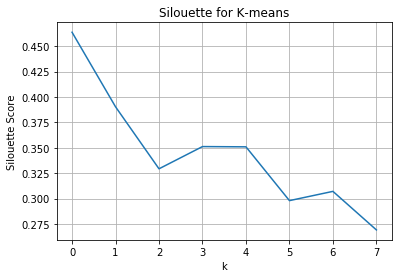

In [13]:
x=df
from sklearn.metrics import silhouette_score
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(x, labels, metric='euclidean'))
plt.plot(score)  
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")

# elbow curve

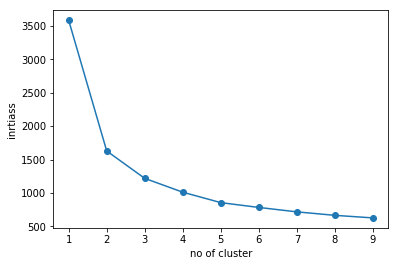

In [14]:
x=df
ks=range(1,10)
inertias=[]
for k in ks:
    # define the model
    model=KMeans(n_clusters=k)
    # fit the model
    model.fit(x)
    # append the inertia
    inertias.append(model.inertia_)
plt.plot(ks,inertias,'-o')
plt.xlabel('no of cluster')
plt.ylabel('inrtiass')
plt.xticks(ks)
plt.show()
# it is for all independent variables from that we take optimal number of cluster

# kmeans

In [15]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
C

NameError: name 'C' is not defined

In [17]:
silhouette_score(x,labels,metric='euclidean')

0.2692475852272376

In [18]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 7, 0, 0, 7,
       0, 7, 6, 1, 1, 1, 1, 7, 0, 7, 0, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1,
       1, 6, 0, 6, 6, 0, 7, 0, 7, 8, 8, 0, 0, 7, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 7, 1, 5, 5, 5, 7, 0, 0, 0, 0, 7, 7, 0, 7, 1, 1, 5,
       5, 5, 1, 1, 1, 5, 1, 1, 1, 6, 6, 6, 6, 6, 0, 1, 1, 1, 1, 6, 7, 0,
       7, 7, 0, 6, 7, 5, 1, 0, 7, 7, 7, 1, 7, 7, 1, 6, 6, 6, 6, 8, 0, 8,
       0, 6, 6, 6, 5, 5, 5, 5, 5, 7, 7, 7, 8, 8, 0, 7, 7, 7, 7, 7, 6, 6,
       6, 6, 1, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 7, 0, 6, 0, 7, 7, 7, 6, 7,
       6, 7, 7, 7, 7, 8, 7, 7, 4, 0, 7, 5, 5, 5, 5, 6, 6, 3, 6, 0, 0, 7,
       8, 6, 6, 6, 6, 7, 8, 7, 4, 7, 5, 0, 3, 3, 5, 5, 5, 5, 8, 4, 8, 4,
       2, 5, 3, 5, 5, 3, 3, 3, 3, 5, 5, 5, 5, 7, 4, 8, 4, 4, 4, 2, 7, 3,
       7, 7, 8, 4, 8, 8, 2, 3, 5, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 5, 5,
       5, 5, 4, 2, 2, 4, 7, 4, 4, 7, 7, 3, 7, 3, 2, 2, 3, 3, 4, 3, 3, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 2, 4, 4, 4, 5, 8, 3,

In [19]:
x[labels==1].mpg

0     -0.706439
1     -1.090751
2     -0.706439
3     -0.962647
4     -0.834543
5     -1.090751
6     -1.218855
7     -1.218855
8     -1.218855
9     -1.090751
10    -1.090751
11    -1.218855
12    -1.090751
13    -1.218855
25    -1.731270
26    -1.731270
27    -1.603167
28    -1.859374
38    -1.218855
39    -1.218855
40    -1.218855
41    -1.218855
42    -1.475063
43    -1.346959
44    -1.346959
62    -1.346959
63    -1.218855
64    -1.090751
65    -1.218855
66    -0.834543
67    -1.603167
68    -1.346959
69    -1.475063
70    -1.346959
72    -1.090751
85    -1.346959
86    -1.218855
90    -1.475063
91    -1.346959
92    -1.346959
94    -1.346959
95    -1.475063
96    -1.346959
103   -1.603167
104   -1.475063
105   -1.346959
106   -1.475063
116   -0.962647
121   -1.090751
124   -1.603167
156   -0.962647
Name: mpg, dtype: float64

In [20]:
# check the distance of one centrod to other centroid
pd.DataFrame(model.cluster_centers_,columns=df.columns)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,0.675824,-0.846671,-0.633452,-0.610459,-0.514822,0.412758,0.964999,-0.633285,0.941412
1,-1.163797,1.498191,1.503923,1.521683,1.404098,-1.086149,-0.688324,-0.715145,-1.062235
2,1.395015,-0.839503,-0.917431,-0.857071,-0.988790,0.460247,0.910208,1.478414,0.912788
3,-0.462902,0.436102,0.312378,-0.048254,0.326789,0.294550,0.032598,-0.525176,-1.062235
4,0.161822,-0.870855,-0.830207,-0.510690,-0.758399,0.217330,-0.751557,0.625694,0.941412


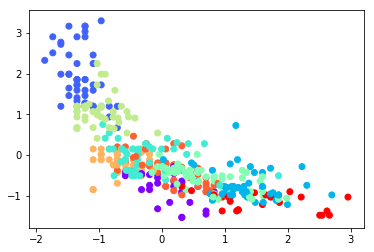

In [21]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
plt.show()

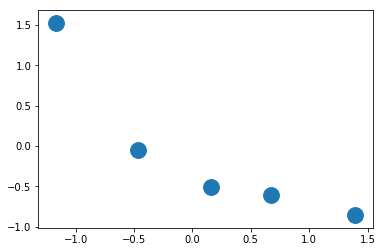

In [22]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,3],s=250)

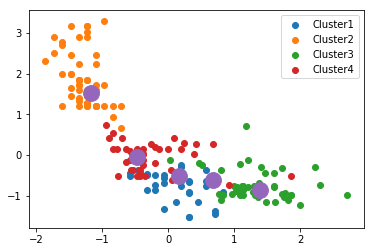

In [24]:
plt.scatter(x[labels==0].mpg,x[labels==0].hp,label="Cluster1")
plt.scatter(x[labels==1].mpg,x[labels==1].hp,label="Cluster2")  
plt.scatter(x[labels==2].mpg,x[labels==2].hp,label="Cluster3") 
plt.scatter(x[labels==3].mpg,x[labels==3].hp,label="Cluster4")
#plt.scatter(x[labels==4].mpg,x[labels==4].hp,label="Cluster5")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,3],s=250)
plt.legend()
plt.show()
# able to plot only 2 dimension
# so overlap may possibe because of cluster count depends on all variable not two(here used two)

# Hierachy clustering

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [65.0, 65.0, 91.25, 91.25],
  [50.0, 50.0, 78.125, 78.125],
  [20.0, 20.0, 64.0625, 64.0625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [230.0, 230.0, 260.0, 260.0],
  [181.875, 181.875, 245.0, 245.0],
  [133.75, 133.75, 213.4375, 213.4375],
  [42.03125, 42.03125, 173.59375, 173.59375],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.

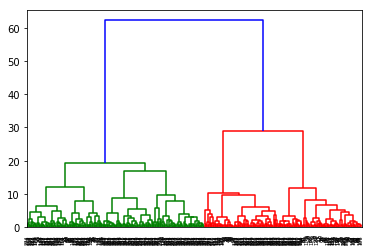

In [25]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(x,method='ward'))

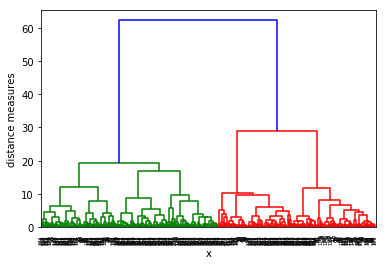

In [26]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.xlabel('x')
plt.ylabel('distance measures')
plt.show()

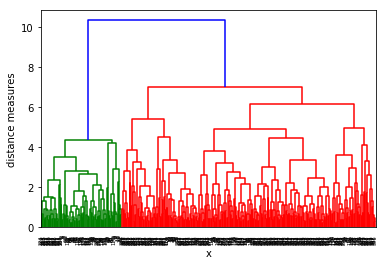

In [27]:
import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(x,method='complete'))
plt.xlabel('x')
plt.ylabel('distance measures')
plt.show()

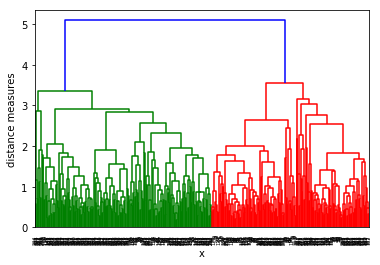

In [28]:
import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(x,method='average'))
plt.xlabel('x')
plt.ylabel('distance measures')
plt.show()

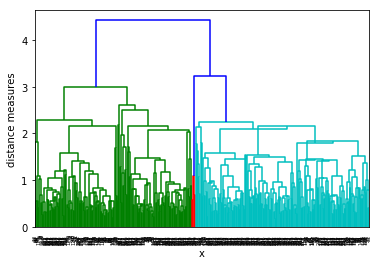

In [29]:
import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(x,method='centroid'))
plt.xlabel('x')
plt.ylabel('distance measures')
plt.show()

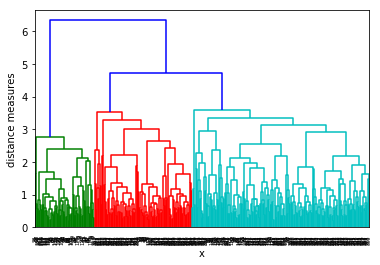

In [30]:
import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(x,method='weighted'))
plt.xlabel('x')
plt.ylabel('distance measures')
plt.show()

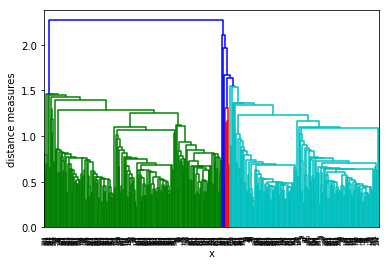

In [31]:
import scipy.cluster.hierarchy as sch

dendogram=sch.dendrogram(sch.linkage(x,method='single'))
plt.xlabel('x')
plt.ylabel('distance measures')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering
model_h=AgglomerativeClustering(n_clusters=5,linkage='ward')

In [33]:
labels=model_h.fit_predict(x)

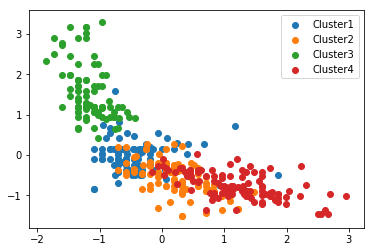

In [34]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4)
model.fit(x)
labels=model.predict(x)
plt.scatter(x[labels==0].mpg,x[labels==0].hp,label="Cluster1")
plt.scatter(x[labels==1].mpg,x[labels==1].hp,label="Cluster2")  
plt.scatter(x[labels==2].mpg,x[labels==2].hp,label="Cluster3") 
plt.scatter(x[labels==3].mpg,x[labels==3].hp,label="Cluster4")
#plt.scatter(x[labels==4].mpg,x[labels==4].hp,label="Cluster5")
#plt.scatter(x[labels==5].mpg,x[labels==4].hp,label="Cluster5")

plt.legend()
plt.show()
# so k=4 is best

# it is based not on cluster

# PCA

# pca

In [36]:
df=pd.read_csv('car-mpg.csv')
df.drop(labels='car_name',axis=1,inplace=True)
df.drop('car_type',axis=1,inplace=True)
df.drop('origin',axis=1,inplace=True)
df.hp.replace({'?': df[df.hp!='?'].hp.median()},inplace=True)
df['hp']=df.hp.astype('float')



x=df.drop('mpg',axis=1)
y=df.mpg

from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)




from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_  
print("explained_variance",explained_variance)



import numpy as np
from sklearn import tree
model2=tree.DecisionTreeRegressor()
model2.fit(x_train,y_train)
ypred=model2.predict(x_test)


print("r2_score",model2.score(x_test,y_test))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,ypred)))

explained_variance [0.70052372 0.14458381 0.11391713 0.02372405 0.0111648  0.00608649]
r2_score 0.7486524235272107
rmse 4.00769052364742


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [39]:
df=pd.read_csv('car-mpg.csv')
df.drop(labels='car_name',axis=1,inplace=True)
df.drop('car_type',axis=1,inplace=True)
df.drop('origin',axis=1,inplace=True)
df.hp.replace({'?': df[df.hp!='?'].hp.median()},inplace=True)
df['hp']=df.hp.astype('float')



x=df.drop('mpg',axis=1)
y=df.mpg



from sklearn import tree
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)




from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


from sklearn.decomposition import PCA
pca = PCA(2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_  
print("explained_variance",explained_variance)




import numpy as np
from sklearn import tree
model2=tree.DecisionTreeRegressor()
model2.fit(x_train,y_train)
ypred=model2.predict(x_test)


print("r2_score",model2.score(x_test,y_test))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,ypred)))

explained_variance [0.70052372 0.14458381]
r2_score 0.698334396359888
rmse 4.390558051091


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [43]:
x_train.shape

(278, 2)

In [42]:
pdf=pd.DataFrame(x_test,columns=['pc1','pc2'])
pdf

,pc1,pc2
0,3.179290,-0.337766
1,-1.291835,-0.726316
2,2.517076,0.018486
3,-1.174716,-0.768403
4,0.745855,-0.972023
5,-2.101992,-1.726631
6,-2.065889,-0.070421
7,-1.346735,-0.918832
8,3.718158,-1.288934
9,0.020096,0.698662


In [44]:
fdf=pd.concat([pdf,df[['mpg']]],axis=1)

In [45]:
fdf.head()

,pc1,pc2,mpg
0,3.179290,-0.337766,18.0
1,-1.291835,-0.726316,15.0
2,2.517076,0.018486,18.0
3,-1.174716,-0.768403,16.0
4,0.745855,-0.972023,17.0


# no scaling

In [46]:
df=pd.read_csv('car-mpg.csv')
df.drop(labels='car_name',axis=1,inplace=True)
df.drop('car_type',axis=1,inplace=True)
df.drop('origin',axis=1,inplace=True)
df.hp.replace({'?': df[df.hp!='?'].hp.median()},inplace=True)
df['hp']=df.hp.astype('float')



x=df.drop('mpg',axis=1)
y=df.mpg



from sklearn import tree
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)



import numpy as np
from sklearn import tree
model2=tree.DecisionTreeRegressor()
model2.fit(x_train,y_train)
ypred=model2.predict(x_test)


print("r2_score",model2.score(x_test,y_test))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,ypred)))


r2_score 0.8398390953335566
rmse 3.199153533879444


# after scaling with whole dataset

In [47]:
df=pd.read_csv('car-mpg.csv')
df.drop(labels='car_name',axis=1,inplace=True)
df.drop('car_type',axis=1,inplace=True)
df.drop('origin',axis=1,inplace=True)
df.hp.replace({'?': df[df.hp!='?'].hp.median()},inplace=True)
df['hp']=df.hp.astype('float')
col=df.columns

df = preprocessing.scale(df)
df = pd.DataFrame(df, columns=col)

x=df.drop('mpg',axis=1)
y=df.mpg


from sklearn import tree
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)



import numpy as np
from sklearn import tree
model2=tree.DecisionTreeRegressor()
model2.fit(x_train,y_train)
ypred=model2.predict(x_test)


print("r2_score",model2.score(x_test,y_test))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,ypred)))


r2_score 0.789624090691729
rmse 0.4696966182334364


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [48]:
ypred

array([-1.2188546 ,  0.31839309, -0.96264665, -0.1940228 , -0.7064387 ,
        0.95891297,  1.08701694, -0.1940228 , -0.96264665,  0.08780594,
        1.13825853,  1.98374476, -0.96264665,  0.31839309, -0.96264665,
        1.21512091,  0.44649707,  0.31839309, -0.96264665,  1.85564079,
       -0.96264665,  0.03656435,  0.31839309, -0.06591883,  1.09982734,
        0.08780594,  0.766757  ,  0.95891297,  1.2791729 , -1.09075062,
       -0.55271393,  1.47132886, -1.09075062,  1.02296495, -0.75768029,
        0.12623713, -0.52709314, -0.96264665,  1.21512091, -1.2188546 ,
       -0.96264665, -0.7064387 ,  0.62584263,  1.2791729 ,  1.20231052,
       -0.45023075, -0.52709314, -0.96264665, -0.45023075,  0.95891297,
        1.11263773,  0.19028912, -0.83454267,  0.06218515, -1.2188546 ,
       -1.85937447, -0.7064387 ,  0.92048177,  1.08701694, -0.96264665,
        0.04937475,  0.31839309, -0.57833473, -0.7064387 , -1.34695857,
       -0.96264665, -0.96264665, -1.09075062,  0.03656435, -0.96

# only train scale

In [49]:
df=pd.read_csv('car-mpg.csv')
df.drop(labels='car_name',axis=1,inplace=True)
df.drop('car_type',axis=1,inplace=True)
df.drop('origin',axis=1,inplace=True)
df.hp.replace({'?': df[df.hp!='?'].hp.median()},inplace=True)
df['hp']=df.hp.astype('float')



x=df.drop('mpg',axis=1)
y=df.mpg



from sklearn import tree
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)




from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)





import numpy as np
from sklearn import tree
model2=tree.DecisionTreeRegressor()
model2.fit(x_train,y_train)
ypred=model2.predict(x_test)


print("r2_score",model2.score(x_test,y_test))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,ypred)))

r2_score 0.7889003248480626
rmse 3.6728281564302283


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [50]:
ypred

array([14. , 28. , 16. , 22. , 18. , 33. , 29.8, 22. , 16. , 32.7, 34.5,
       39. , 16. , 26. , 16. , 33. , 27. , 26.6, 16.5, 38. , 16. , 23.8,
       28. , 23. , 34.2, 32.7, 32.1, 32.4, 33.5, 16. , 19. , 35. , 15. ,
       30. , 26.6, 25.1, 19.4, 15. , 33. , 14. , 16. , 17. , 29.8, 33.5,
       27. , 20. , 19.4, 15. , 20. , 31. , 36. , 25. , 16.5, 26. , 14. ,
       10. , 18. , 30.7, 32. , 16. , 23.9, 27.5, 19. , 18. , 13. , 16. ,
       16. , 15. , 23.8, 16. , 36. , 12. , 25. , 18. , 25. , 30. , 31.5,
       32. , 32. , 15. , 14. , 26. , 32.4, 26. , 27. , 29.5, 31.3, 22. ,
       28.1, 34.7, 26. , 12. , 20. , 33. , 25. , 19.2, 19.2, 26. , 19.8,
       13. , 19.8, 43.1, 26.4, 24. , 40.8, 24. , 24.5, 15.5, 13. , 23. ,
       25. , 29. , 20.2, 40.8, 28. , 24.5, 36. , 13. , 16. , 39.4])

# 3d plot

In [51]:
df=pd.read_csv('car-mpg.csv')
df.drop(labels='car_name',axis=1,inplace=True)
df.drop('car_type',axis=1,inplace=True)
df.drop('origin',axis=1,inplace=True)
df.hp.replace({'?': df[df.hp!='?'].hp.median()},inplace=True)
df['hp']=df.hp.astype('float')


df.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


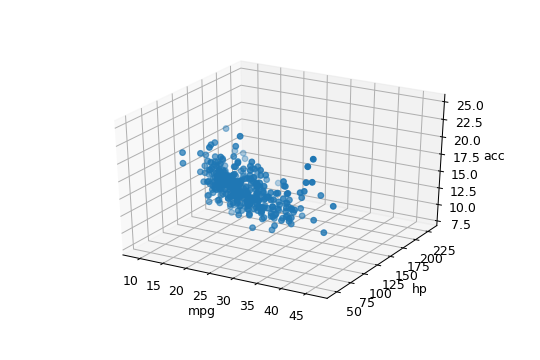

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook


fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x=df.iloc[:,0]
y=df.iloc[:,3]
z=df.iloc[:,5]
ax.scatter(x,y,z,marker='o')
ax.set_xlabel("mpg")
ax.set_ylabel("hp")
ax.set_zlabel('acc')
plt.show()